### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 3
### Due: Friday, Sep 15 at 11:59 pm CT

## Problem 1

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

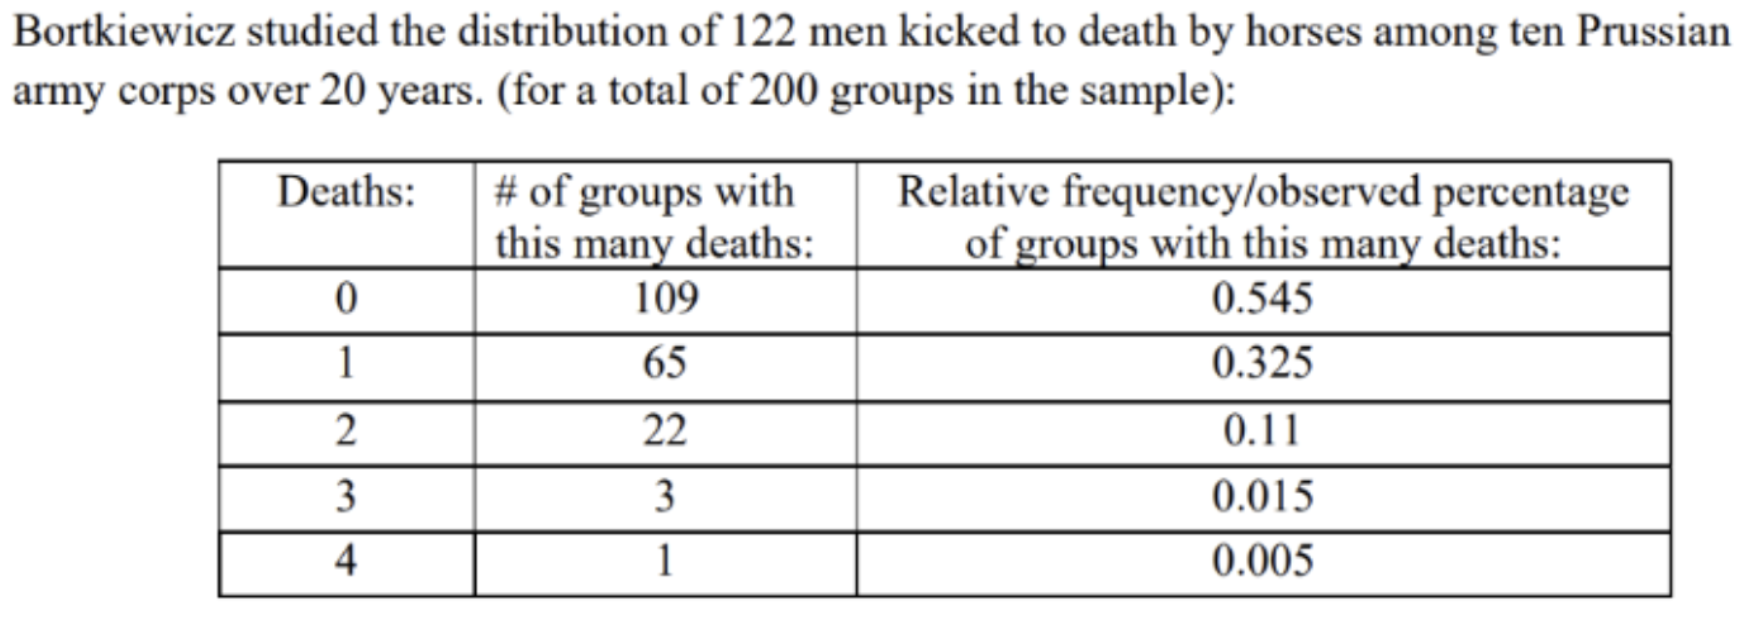

The data essentially consist of 200 total years of Prussian army corps information (i.e., ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.


<h1> 1.1 </h1>

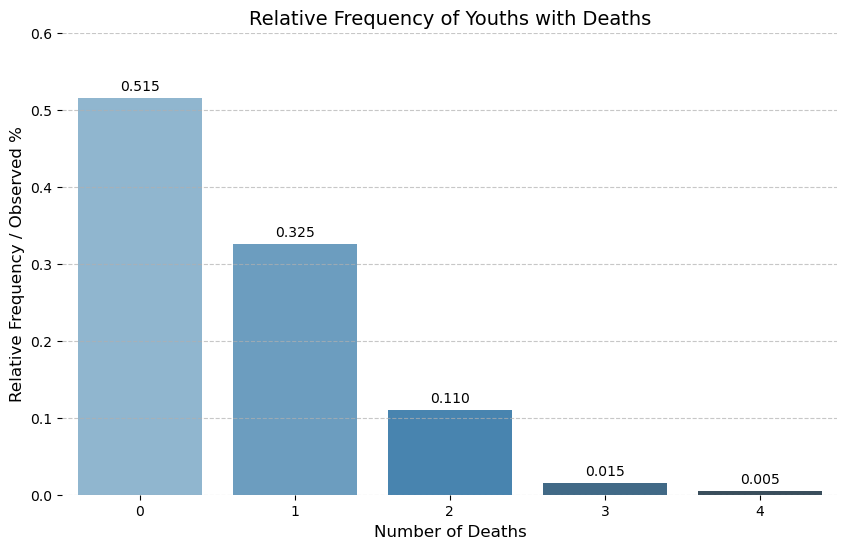

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Given data
deaths = [0, 1, 2, 3, 4]
observed_percent = [0.515, 0.325, 0.11, 0.015, 0.005]

# Set a custom color palette for the plot
sns.set_palette("pastel")

# Create a bar plot with Seaborn style
plt.figure(figsize=(10, 6))
sns.barplot(x=deaths, y=observed_percent, palette="Blues_d")
plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('Relative Frequency / Observed %', fontsize=12)
plt.title('Relative Frequency of Youths with Deaths', fontsize=14)
plt.xticks(deaths, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 0.6)  # Adjust the y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
sns.despine(left=True, bottom=True)  # Remove the left and bottom spines

# Annotate the bars with their values
for x, y in zip(deaths, observed_percent):
    plt.text(x, y + 0.01, f'{y:.3f}', ha='center', fontsize=10)

plt.show()


<h1> 1.2 </h1>

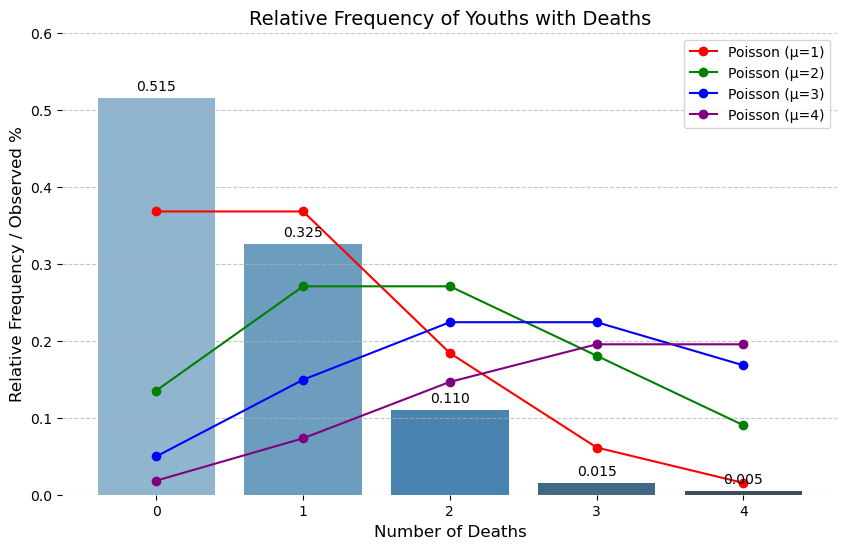

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import poisson

# Given data
deaths = [0, 1, 2, 3, 4]
observed_percent = [0.515, 0.325, 0.11, 0.015, 0.005]

# Set a custom color palette for the plot
sns.set_palette("pastel")

# Create a bar plot with Seaborn style (same as before)
plt.figure(figsize=(10, 6))
sns.barplot(x=deaths, y=observed_percent, palette="Blues_d")
plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('Relative Frequency / Observed %', fontsize=12)
plt.title('Relative Frequency of Youths with Deaths', fontsize=14)
plt.xticks(deaths, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 0.6)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)

# Annotate the bars with their values
for x, y in zip(deaths, observed_percent):
    plt.text(x, y + 0.01, f'{y:.3f}', ha='center', fontsize=10)

# Plot Poisson distributions with different mean values 
mu_values = [1, 2, 3, 4]
x_poisson = np.arange(0, max(deaths) + 1)

# Define colors for Poisson distributions
colors = ['red', 'green', 'blue', 'purple']

for mu, color in zip(mu_values, colors):
    pmf = poisson.pmf(x_poisson, mu)     #Computing Probability Mass Function (pmf) 
    plt.plot(x_poisson, pmf, '-o', label=f'Poisson (μ={mu})', color=color)

plt.legend(fontsize=10)
plt.show()


<h1> 1.3 </h1>

In [11]:
# Given data (tabulated densities)
data = {
    'Deaths': [0, 1, 2, 3, 4],
    'Frequency': [109, 65, 22, 3, 1]
}

# Create a dataset by repeating values according to their frequency
dataset = []
for deaths, freq in zip(data['Deaths'], data['Frequency']):
    dataset.extend([deaths] * freq)

# Calculate the weighted mean
weighted_mean = sum(dataset) / len(dataset)

# Calculate the weighted standard deviation
weighted_std = (sum((x - weighted_mean) ** 2 * dataset.count(x) for x in dataset) / len(dataset)) ** 0.5

# Calculate the median
cumulative_freq = np.cumsum(data['Frequency']) / sum(data['Frequency'])
median = data['Deaths'][np.argmin(np.abs(cumulative_freq - 0.5))]

# Calculate the mode
mode = data['Deaths'][data['Frequency'].index(max(data['Frequency']))]

# Calculate skewness and kurtosis
skewness = sum(((x - weighted_mean) / weighted_std) ** 3 * dataset.count(x) for x in dataset) / len(dataset)
kurtosis = sum(((x - weighted_mean) / weighted_std) ** 4 * dataset.count(x) for x in dataset) / len(dataset)

# Print the results
print(f"Weighted Mean (μ): {weighted_mean:.3f}")
print(f"Weighted Standard Deviation: {weighted_std:.3f}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Skewness: {skewness:.3f}")
print(f"Kurtosis: {kurtosis:.3f}")


Weighted Mean (μ): 0.610
Weighted Standard Deviation: 5.505
Median: 0
Mode: 0
Skewness: -0.030
Kurtosis: 0.022


<h1> 1.4 </h1>

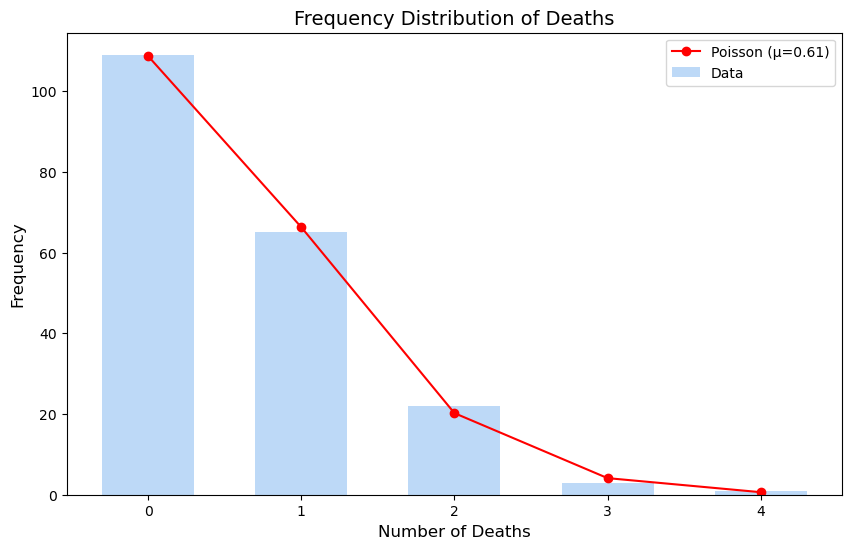

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

# Given data (tabulated densities)
data = {
    'Deaths': [0, 1, 2, 3, 4],
    'Frequency': [109, 65, 22, 3, 1]
}

# Create a dataset by repeating values according to their frequency
dataset = []
for deaths, freq in zip(data['Deaths'], data['Frequency']):
    dataset.extend([deaths] * freq)

# Calculate the weighted mean (μ)
weighted_mean = sum(dataset) / len(dataset)

# Generate values for the Poisson distribution
x_poisson = np.arange(0, max(data['Deaths']) + 1)
poisson_pmf = poisson.pmf(x_poisson, weighted_mean)

# Create a bar plot of the data
plt.figure(figsize=(10, 6))
plt.bar(data['Deaths'], data['Frequency'], width=0.6, alpha=0.7, label='Data')
plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency Distribution of Deaths', fontsize=14)

# Overlay the Poisson distribution on the bar plot
plt.plot(x_poisson, poisson_pmf * sum(data['Frequency']), '-o', color='red', label=f'Poisson (μ={weighted_mean:.2f})')

# Set the x-axis ticks to match the data values
plt.xticks(data['Deaths'], fontsize=10)

plt.legend(fontsize=10)
plt.show()


## Problem 2
Suppose you went to a bank to withdraw some cash. The bank teller serves customers standing in the queue one by one. Suppose that the service time $x_i$ for customer $i$ has mean 2 minutes and variance 1 minute. Assume that service times for different bank customers are independent. If y is the total time the bank teller spends serving 50 customers, find p(90 minutes < y < 110 minutes).

<h2> Solution 2 </h2>

In this problem, we know that the service times for different customers are independent and follow a normal distribution with a mean of 2 minutes and a variance of 1 minute. Mathematically, we can write $x_{i} ∼ Normal(2,1)$. Then the total time $y$ spent serving 50 customers is the sum of the service times for all 50 customers: $y = x_{1} + x_{2} + x_{3} +... +x_{50}$. Since $x_{i}$ are independent and identically distributed, $Y$ follows a normal distribution with the parameters: 

* Mean ($\mu_{y}$) of $50×2=100$ minutes.
* Variance ($\sigma_{y}^{2}$) of $50×1=50$ minutes squared (since $\sigma_{a+b}^{2} = \sigma_{a}^{2}+ \sigma_{b}^{2}$ and we can scale this to 50 elements)

Now, we want to find $P(90<y<110)$. To do this, we can standardize the variable $y$ using a variable z. We are basically converting the Y distribution into Z which is a simple normal distribution with mean $\mu_{z}=0$ and $\sigma^{2}_{z} = \sigma_{z} =1$ (and finding the cdf becomes easy with scipy's `stats.norm.cdf`). Thus, 

$z = \frac{y-\mu_{y}}{\sigma_y}$. Now we can convert $y$ upper and lower bounds into $z$ upper and lower bounds, thus, $z_{lower} = \frac{y_{lower}-\mu_{y}}{\sigma_y}$, and $z_{upper} = \frac{y_{upper}-\mu_{y}}{\sigma_y}$. So for $y_{lower} = 90, y_{upper} = 110, \mu_{y} = 100, \sigma_{y} = 50$, we get $z_{lower} \approx -1.41$, and $z_{upper} \approx +1.41$. Then we can just use `stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)` in python to get the difference of the cdf of z. The python script below calculates what we are looking for.



In [13]:
import scipy.stats as stats

# Define the parameters of the normal distribution
mean_Y = 100  # Mean of Y
variance_Y = 50  # Variance of Y

# Define the lower and upper bounds for the probability calculation
lower_bound = 90
upper_bound = 110

# Calculate the standard deviation of Y
std_dev_Y = (variance_Y)**0.5

# Calculate the z-scores for the lower and upper bounds
z_lower = (lower_bound - mean_Y) / std_dev_Y
z_upper = (upper_bound - mean_Y) / std_dev_Y

# Use the cumulative distribution function (CDF) of the standard normal distribution to find the probability
probability = stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)

# Print the probability
print(f"P(90 minutes < Y < 110 minutes) = {probability:.4f}")


P(90 minutes < Y < 110 minutes) = 0.8427
